<a href="https://colab.research.google.com/github/GuilhermeNL01/Trabalho-Final-Novas-Tecnologias/blob/main/Trabalho_Novas_Tecnologias_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Final Novas Tecnologias





# Introdução


- Felipe Vasconcelos Cardoso UC22101240
- Guilherme Nunes Lobo UC22102052


Este é um jupyter notebook elaborado na ferramenta Google Colab, realizado pelos Alunos Felipe Vasconcelos Cardoso e Guilherme Nunes Lobo com o objetivo  para a obtenção de nota para a disciplina de  Novas Tecnologias ministrada por Remis Balaniuk

# Descrição do Dataset




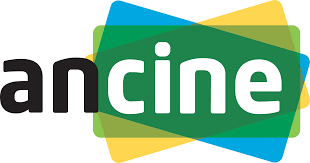




Este é um Dataset proveniente da Agência Nacional de Cinema (Ancine), onde são catalogados diversas informações sobre lançamentos de obras cinematográficas realizadas por diversas distribuidoras. Cada registro no dataset representa um lançamento específico e inclui os seguintes campos:

- **DATA_LANCAMENTO_OBRA**: A data em que a obra foi lançada.
- **TITULO_ORIGINAL**: O título original da obra.
- **CPB_ROE**: Um código de identificação da obra.
- **TIPO_OBRA**: O tipo da obra, por exemplo, Ficção ou Documentário.
- **PAIS_OBRA**: O país de origem da obra.
- **PUBLICO_TOTAL**: O número total de espectadores que assistiram à obra.
- **RENDA_TOTAL**: A renda total gerada pela obra.
- **RAZAO_SOCIAL_DISTRIBUIDORA**: A razão social da distribuidora responsável pelo lançamento da obra.
- **REGISTRO_DISTRIBUIDORA**: O registro da distribuidora.
- **CNPJ_DISTRIBUIDORA**: O CNPJ da distribuidora.














# Configuração Inicial


**Considerações para a Análise**
1. **Conversão de Tipos**: Algumas colunas, como `DATA_LANCAMENTO_OBRA`, `PUBLICO_TOTAL` e `RENDA_TOTAL`, devem ser convertidas para tipos de dados mais adequados (datas e numéricos).
2. **Limpeza dos Dados**: É necessário realizar a limpeza dos dados, corrigindo formatações e removendo possíveis inconsistências.
3. **Análise Exploratória**: Realizar uma análise exploratória dos dados para entender melhor suas características e identificar padrões.
4. **Estatísticas Descritivas**: Calcular estatísticas descritivas básicas para resumir as principais características do dataset.
5. **Classificação dos Dados**: Implementar algoritmos de classificação para categorizar os dados conforme os objetivos específicos da análise.



**Imports**

In [1]:
#imports principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Carregando o Arquivo .
CSV**

In [2]:
import pandas as pd

# carregando o csv
file_path = '/content/Lançamentos Comerciais Distribuidoras.csv'
df = pd.read_csv(file_path, sep=';', on_bad_lines='skip')

# mostrando um exemplo rápido para apuração
df.head()


DATA_LANCAMENTO_OBRA    TITULO_ORIGINAL         CPB_ROE     TIPO_OBRA  \
0           18/04/2024        SEM CORAÇÃO  B2400126700000        FICÇÃO   
1           18/04/2024        SILVER HAZE  E2300345200000        FICÇÃO   
2           18/04/2024  UM TIRO NO ESCURO  B2300243500000  DOCUMENTÁRIO   
3           04/04/2024    ARTHUR THE KING  E2400002700000        FICÇÃO   
4           04/04/2024    DOMINGO À NOITE  B2200374800000        FICÇÃO   

        PAIS_OBRA  PUBLICO_TOTAL    RENDA_TOTAL  \
0          ITÁLIA           4275   R$ 41.965,91   
1         HOLANDA            194    R$ 4.017,03   
2          BRASIL             83      R$ 830,00   
3  ESTADOS UNIDOS           4062  R$ 100.050,06   
4          BRASIL           1854   R$ 32.293,53   

                          RAZAO_SOCIAL_DISTRIBUIDORA  REGISTRO_DISTRIBUIDORA  \
0                                VITRINE FILMES LTDA                 16713.0   
1                                 BITELLI FILMS LTDA                 52026.0   
2              VEREDA INTERNACIONAL AUDIOVISUAL LTDA                 20529.0   
3  DIAMOND FILMS DO BRASIL PRODUÇÃO E DISTRIBUIÇÃ...                 22724.0   
4   O2 PRODUÇÕES ARTÍSTICAS E CINEMATOGRÁFICAS LTDA.                    63.0   

   CNPJ_DISTRIBUIDORA  
0  11.620.976/0001-83  
1  47.721.628/0001-40  
2  09.112.697/0001-67  
3  17.095.184/0001-13  
4  67.431.718/0001-03

**Visualização Inicial**

 Estrutura do Dataset

- **Número de entradas**: 6114
- **Número de colunas**: 10
- **Tipos de dados**: Maioria dos campos são inicialmente do tipo `object` (texto).



In [3]:
df.dtypes

DATA_LANCAMENTO_OBRA           object
TITULO_ORIGINAL                object
CPB_ROE                        object
TIPO_OBRA                      object
PAIS_OBRA                      object
PUBLICO_TOTAL                   int64
RENDA_TOTAL                    object
RAZAO_SOCIAL_DISTRIBUIDORA     object
REGISTRO_DISTRIBUIDORA        float64
CNPJ_DISTRIBUIDORA             object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6114 entries, 0 to 6113
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DATA_LANCAMENTO_OBRA        6114 non-null   object 
 1   TITULO_ORIGINAL             6114 non-null   object 
 2   CPB_ROE                     6114 non-null   object 
 3   TIPO_OBRA                   6114 non-null   object 
 4   PAIS_OBRA                   6114 non-null   object 
 5   PUBLICO_TOTAL               6114 non-null   int64  
 6   RENDA_TOTAL                 6114 non-null   object 
 7   RAZAO_SOCIAL_DISTRIBUIDORA  6114 non-null   object 
 8   REGISTRO_DISTRIBUIDORA      6113 non-null   float64
 9   CNPJ_DISTRIBUIDORA          6114 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 477.8+ KB


In [5]:
df.describe()

PUBLICO_TOTAL  REGISTRO_DISTRIBUIDORA
count   6.114000e+03             6113.000000
mean    3.370242e+05             9537.390152
std     1.129653e+06            11128.685310
min     1.000000e+00                6.000000
25%     1.708750e+03              265.000000
50%     1.139850e+04             4904.000000
75%     1.125115e+05            16713.000000
max     1.965648e+07            53644.000000

# Limpeza dos Dados

**Conversão dos Tipos de Dados**

In [6]:
# Importação das bibliotecas necessárias
import pandas as pd

# Carregamento do dataset
df = pd.read_csv('/content/Lançamentos Comerciais Distribuidoras.csv', sep=';')

# Convertendo 'DATA_LANCAMENTO_OBRA' para datetime
df['DATA_LANCAMENTO_OBRA'] = pd.to_datetime(df['DATA_LANCAMENTO_OBRA'], format='%d/%m/%Y', errors='coerce')

# Convertendo 'PUBLICO_TOTAL' para string antes de remover caracteres e converter para numérico
df['PUBLICO_TOTAL'] = df['PUBLICO_TOTAL'].astype(str).str.replace(',', '').str.replace('.', '')
df['PUBLICO_TOTAL'] = pd.to_numeric(df['PUBLICO_TOTAL'], errors='coerce')

# Convertendo 'RENDA_TOTAL' para string antes de remover caracteres e converter para numérico
df['RENDA_TOTAL'] = df['RENDA_TOTAL'].astype(str).str.replace('R\$', '', regex=True).str.replace('.', '').str.replace(',', '.')
df['RENDA_TOTAL'] = pd.to_numeric(df['RENDA_TOTAL'], errors='coerce').astype('float64')

# Exibir as primeiras linhas e as informações gerais do DataFrame
print(df.head())
print(df.info())

# Exibir as estatísticas descritivas
print(df.describe())

# Verificação final do tipo de dado
print(df['RENDA_TOTAL'].dtype)


  DATA_LANCAMENTO_OBRA    TITULO_ORIGINAL         CPB_ROE     TIPO_OBRA  \
0           2024-04-18        SEM CORAÇÃO  B2400126700000        FICÇÃO   
1           2024-04-18        SILVER HAZE  E2300345200000        FICÇÃO   
2           2024-04-18  UM TIRO NO ESCURO  B2300243500000  DOCUMENTÁRIO   
3           2024-04-04    ARTHUR THE KING  E2400002700000        FICÇÃO   
4           2024-04-04    DOMINGO À NOITE  B2200374800000        FICÇÃO   

        PAIS_OBRA  PUBLICO_TOTAL  RENDA_TOTAL  \
0          ITÁLIA           4275     41965.91   
1         HOLANDA            194      4017.03   
2          BRASIL             83       830.00   
3  ESTADOS UNIDOS           4062    100050.06   
4          BRASIL           1854     32293.53   

                          RAZAO_SOCIAL_DISTRIBUIDORA  REGISTRO_DISTRIBUIDORA  \
0                                VITRINE FILMES LTDA                 16713.0   
1                                 BITELLI FILMS LTDA                 52026.0   
2             

**Tratamento de Valores Nulos**

Vendo a quantidade de valores nulos no dataframe

In [7]:
df.isnull().sum()


DATA_LANCAMENTO_OBRA          0
TITULO_ORIGINAL               0
CPB_ROE                       0
TIPO_OBRA                     0
PAIS_OBRA                     0
PUBLICO_TOTAL                 0
RENDA_TOTAL                   0
RAZAO_SOCIAL_DISTRIBUIDORA    0
REGISTRO_DISTRIBUIDORA        1
CNPJ_DISTRIBUIDORA            0
dtype: int64

In [8]:
# Substituir os valores nulos em REGISTRO_DISTRIBUIDORA por 0
df['REGISTRO_DISTRIBUIDORA'].fillna(0, inplace=True)

# Verificar novamente a quantidade de valores nulos
print(df.isnull().sum())



DATA_LANCAMENTO_OBRA          0
TITULO_ORIGINAL               0
CPB_ROE                       0
TIPO_OBRA                     0
PAIS_OBRA                     0
PUBLICO_TOTAL                 0
RENDA_TOTAL                   0
RAZAO_SOCIAL_DISTRIBUIDORA    0
REGISTRO_DISTRIBUIDORA        0
CNPJ_DISTRIBUIDORA            0
dtype: int64


Agora exibindo o dataframe após a remoção dos valores nulos e da conversão dos tipos de dados

In [9]:
df.head()


DATA_LANCAMENTO_OBRA    TITULO_ORIGINAL         CPB_ROE     TIPO_OBRA  \
0           2024-04-18        SEM CORAÇÃO  B2400126700000        FICÇÃO   
1           2024-04-18        SILVER HAZE  E2300345200000        FICÇÃO   
2           2024-04-18  UM TIRO NO ESCURO  B2300243500000  DOCUMENTÁRIO   
3           2024-04-04    ARTHUR THE KING  E2400002700000        FICÇÃO   
4           2024-04-04    DOMINGO À NOITE  B2200374800000        FICÇÃO   

        PAIS_OBRA  PUBLICO_TOTAL  RENDA_TOTAL  \
0          ITÁLIA           4275     41965.91   
1         HOLANDA            194      4017.03   
2          BRASIL             83       830.00   
3  ESTADOS UNIDOS           4062    100050.06   
4          BRASIL           1854     32293.53   

                          RAZAO_SOCIAL_DISTRIBUIDORA  REGISTRO_DISTRIBUIDORA  \
0                                VITRINE FILMES LTDA                 16713.0   
1                                 BITELLI FILMS LTDA                 52026.0   
2              VEREDA INTERNACIONAL AUDIOVISUAL LTDA                 20529.0   
3  DIAMOND FILMS DO BRASIL PRODUÇÃO E DISTRIBUIÇÃ...                 22724.0   
4   O2 PRODUÇÕES ARTÍSTICAS E CINEMATOGRÁFICAS LTDA.                    63.0   

   CNPJ_DISTRIBUIDORA  
0  11.620.976/0001-83  
1  47.721.628/0001-40  
2  09.112.697/0001-67  
3  17.095.184/0001-13  
4  67.431.718/0001-03

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6114 entries, 0 to 6113
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DATA_LANCAMENTO_OBRA        6114 non-null   datetime64[ns]
 1   TITULO_ORIGINAL             6114 non-null   object        
 2   CPB_ROE                     6114 non-null   object        
 3   TIPO_OBRA                   6114 non-null   object        
 4   PAIS_OBRA                   6114 non-null   object        
 5   PUBLICO_TOTAL               6114 non-null   int64         
 6   RENDA_TOTAL                 6114 non-null   float64       
 7   RAZAO_SOCIAL_DISTRIBUIDORA  6114 non-null   object        
 8   REGISTRO_DISTRIBUIDORA      6114 non-null   float64       
 9   CNPJ_DISTRIBUIDORA          6114 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 477.8+ KB


In [11]:
df.describe()

DATA_LANCAMENTO_OBRA  PUBLICO_TOTAL   RENDA_TOTAL  \
count                           6114   6.114000e+03  6.114000e+03   
mean   2016-10-28 19:25:22.669283584   3.370242e+05  4.606209e+06   
min              2009-01-01 00:00:00   1.000000e+00  3.410000e+00   
25%              2013-06-21 00:00:00   1.708750e+03  2.138659e+04   
50%              2016-10-06 00:00:00   1.139850e+04  1.524454e+05   
75%              2019-12-05 00:00:00   1.125115e+05  1.542597e+06   
max              2024-04-18 00:00:00   1.965648e+07  3.386250e+08   
std                              NaN   1.129653e+06  1.657247e+07   

       REGISTRO_DISTRIBUIDORA  
count             6114.000000  
mean              9535.830226  
min                  0.000000  
25%                265.000000  
50%               4904.000000  
75%              16713.000000  
max              53644.000000  
std              11128.443496

#  Análise Exploratória dos Dados

**Distribuição das Variáveis Numéricas**

Para entender a relação entre o público total e a renda gerada pelas obras cinematográficas, foram gerados gráficos das variáveis numéricas PUBLICO_TOTAL e RENDA_TOTAL. A análise dessas distribuições nos ajuda a verificar se a quantidade total de público está afetando diretamente a distribuição da renda total. Se a renda total fosse diretamente proporcional ao público total, poderíamos esperar que as distribuições dessas duas variáveis fossem semelhantes.






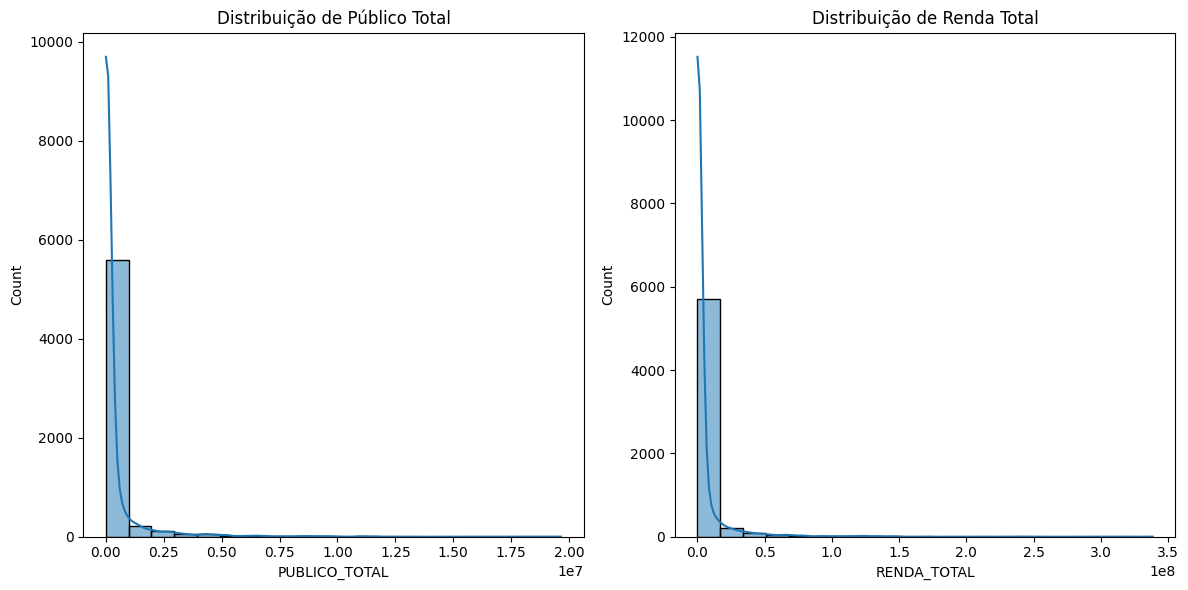

In [12]:
# Distribuição das variáveis numéricas
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramas das variáveis numéricas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['PUBLICO_TOTAL'], bins=20, kde=True)
plt.title('Distribuição de Público Total')

plt.subplot(1, 2, 2)
sns.histplot(df['RENDA_TOTAL'], bins=20, kde=True)
plt.title('Distribuição de Renda Total')

plt.tight_layout()
plt.show()


**Explorando Relações entre variáveis numéricas**

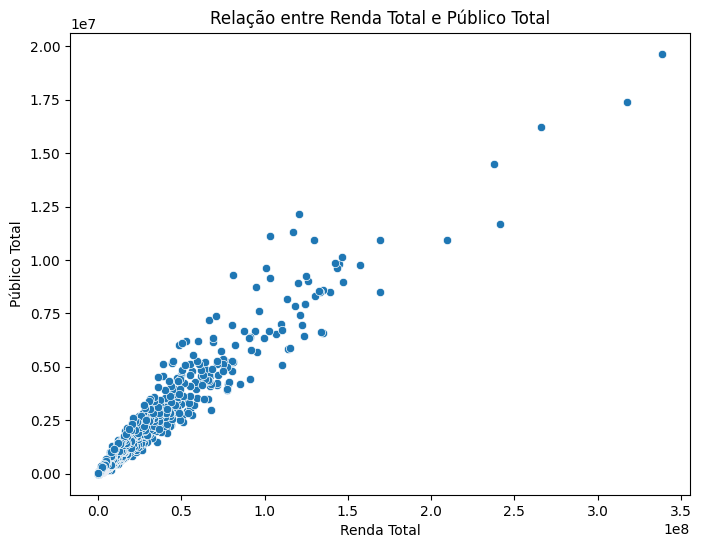

In [13]:
# Scatter plot para explorar relação entre variáveis numéricas
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RENDA_TOTAL', y='PUBLICO_TOTAL', data=df)
plt.title('Relação entre Renda Total e Público Total')
plt.xlabel('Renda Total')
plt.ylabel('Público Total')
plt.show()


**Matriz de Correlação**

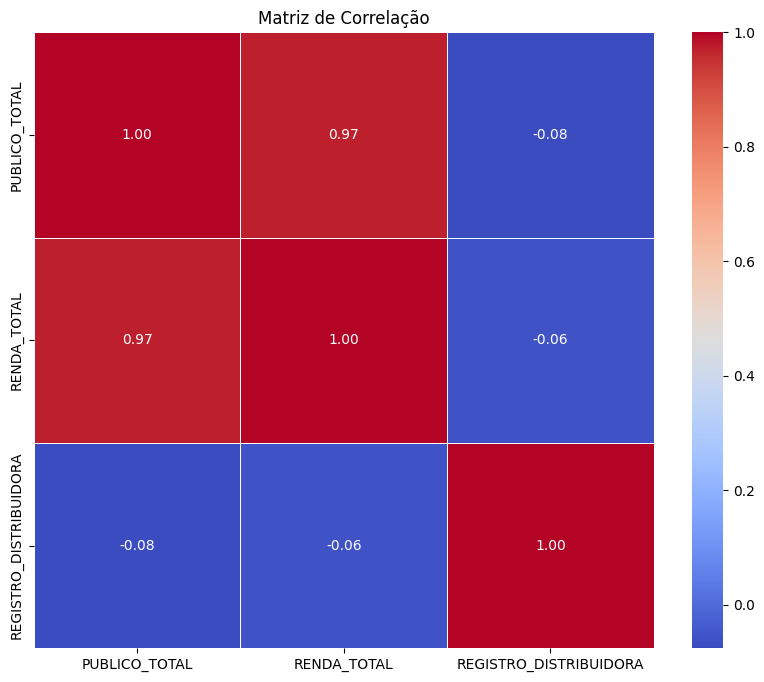

In [14]:
# Matriz de correlação
# Selecionando apenas colunas numéricas
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_df = df[numeric_columns]

# Calculando a matriz de correlação apenas nas colunas numéricas
corr_matrix = numeric_df.corr()

# Plot da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

**Visualizações Específicas por Tipo de Dados**

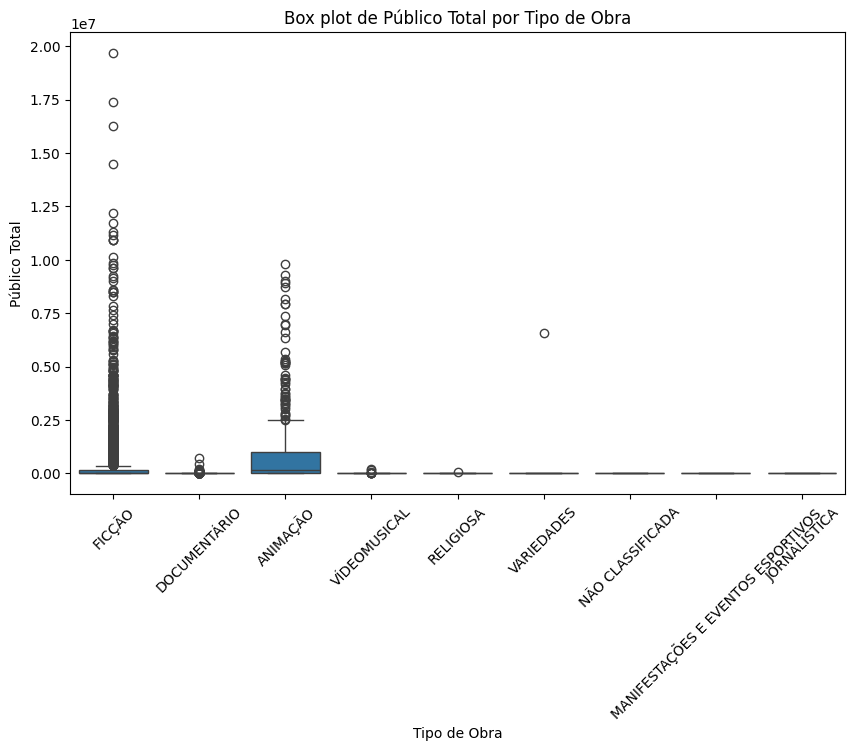

In [15]:
# Box plot para variáveis categóricas e numéricas
plt.figure(figsize=(10, 6))
sns.boxplot(x='TIPO_OBRA', y='PUBLICO_TOTAL', data=df)
plt.title('Box plot de Público Total por Tipo de Obra')
plt.xlabel('Tipo de Obra')
plt.ylabel('Público Total')
plt.xticks(rotation=45)
plt.show()


# Profilling

In [16]:
#determinar os tipos de cada coluna
def obtem_categoria(series):
    unique_count = series.nunique(dropna=False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numérico'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Data'
    elif unique_count==total_count:
        return 'Texto'
    else:
        return 'Categórico'

def print_categorias(df):
    for column_name in df.columns:
        print(column_name, ": ", obtem_categoria(df[column_name]))

In [17]:
print_categorias(df)

DATA_LANCAMENTO_OBRA :  Data
TITULO_ORIGINAL :  Categórico
CPB_ROE :  Categórico
TIPO_OBRA :  Categórico
PAIS_OBRA :  Categórico
PUBLICO_TOTAL :  Numérico
RENDA_TOTAL :  Numérico
RAZAO_SOCIAL_DISTRIBUIDORA :  Categórico
REGISTRO_DISTRIBUIDORA :  Numérico
CNPJ_DISTRIBUIDORA :  Categórico


In [18]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=81bf3d9632436aca2ca63d31e32156dc40bfdb3fe40974f5c62f3d87764879de
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


**Gerando o HTML do Profiling**

In [19]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report")
profile.to_file("report.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
from IPython.display import HTML

# Carrega o Report.html
with open('report.html') as f:
    report_html = f.read()

#Mostra o HTML do Profiling
display(HTML(report_html))


# Estatística Descritiva e Gráficos Relevantes


In [21]:
tamanho = len(df)
tamanho

6114

In [22]:
print("Quantas obras possuem data de lancamento:",df['DATA_LANCAMENTO_OBRA'].count() )

Quantas obras possuem data de lancamento: 6114


In [23]:
print("PÚBLICO MÍNIMO:", df['PUBLICO_TOTAL'].min())
print("PÚBLICO MÁXIMO: ", df['PUBLICO_TOTAL'].max())

PÚBLICO MÍNIMO: 1
PÚBLICO MÁXIMO:  19656475


In [24]:
df[['RENDA_TOTAL','PUBLICO_TOTAL']].corr()


RENDA_TOTAL  PUBLICO_TOTAL
RENDA_TOTAL       1.000000       0.972802
PUBLICO_TOTAL     0.972802       1.000000

In [25]:
# Exemplo de estatísticas descritivas
print("Medidas de tendência central:")
print(df['RENDA_TOTAL'].mean())
print(df['RENDA_TOTAL'].median())
print(df['RENDA_TOTAL'].mode())
print()

print("Desvio padrão:")
print(df['RENDA_TOTAL'].std())
print()

print("Valores mínimo e máximo:")
print(df['RENDA_TOTAL'].min())
print(df['RENDA_TOTAL'].max())
print()

df.describe()


Medidas de tendência central:
4606209.260894668
152445.425
0    240.0
Name: RENDA_TOTAL, dtype: float64

Desvio padrão:
16572472.74868693

Valores mínimo e máximo:
3.41
338624955.58



DATA_LANCAMENTO_OBRA  PUBLICO_TOTAL   RENDA_TOTAL  \
count                           6114   6.114000e+03  6.114000e+03   
mean   2016-10-28 19:25:22.669283584   3.370242e+05  4.606209e+06   
min              2009-01-01 00:00:00   1.000000e+00  3.410000e+00   
25%              2013-06-21 00:00:00   1.708750e+03  2.138659e+04   
50%              2016-10-06 00:00:00   1.139850e+04  1.524454e+05   
75%              2019-12-05 00:00:00   1.125115e+05  1.542597e+06   
max              2024-04-18 00:00:00   1.965648e+07  3.386250e+08   
std                              NaN   1.129653e+06  1.657247e+07   

       REGISTRO_DISTRIBUIDORA  
count             6114.000000  
mean              9535.830226  
min                  0.000000  
25%                265.000000  
50%               4904.000000  
75%              16713.000000  
max              53644.000000  
std              11128.443496

In [26]:
# Exemplo de estatísticas descritivas
print("Medidas de tendência central:")
print(df['PUBLICO_TOTAL'].mean())
print(df['PUBLICO_TOTAL'].median())
print(df['PUBLICO_TOTAL'].mode())

print()

print("Desvio padrão:")
print(df['PUBLICO_TOTAL'].std())
print()


Medidas de tendência central:
337024.1738632646
11398.5
0    37
Name: PUBLICO_TOTAL, dtype: int64

Desvio padrão:
1129652.7164482467



In [27]:
# Exemplo de contagem e frequência de valores únicos
print("Contagem de valores únicos:")
print(df['TITULO_ORIGINAL'].value_counts())
print()


Contagem de valores únicos:
TITULO_ORIGINAL
FRIDAY THE 13TH                 4
THE SHINING                     4
WISH                            3
AQUAMAN AND THE LOST KINGDOM    3
THE BEEKEEPER                   3
                               ..
MARCHA CEGA                     1
LA NOCHE DE 12 AÑOS             1
A SIMPLE FAVOR                  1
A MOÇA DO CALENDÁRIO            1
LA BELLE PERSONNE               1
Name: count, Length: 5916, dtype: int64



In [28]:
df['PUBLICO_TOTAL'].quantile([.25, .5, .75])

0.25      1708.75
0.50     11398.50
0.75    112511.50
Name: PUBLICO_TOTAL, dtype: float64

PUBLICO_TOTAL  RENDA_TOTAL
0              4275     41965.91
1               194      4017.03
2                83       830.00
3              4062    100050.06
4              1854     32293.53
...             ...          ...
6109         291713   2350017.91
6110          29830     37557.00
6111        6113251  50545885.00
6112        1162616   9590392.25
6113          17207    141070.93

[6114 rows x 2 columns]

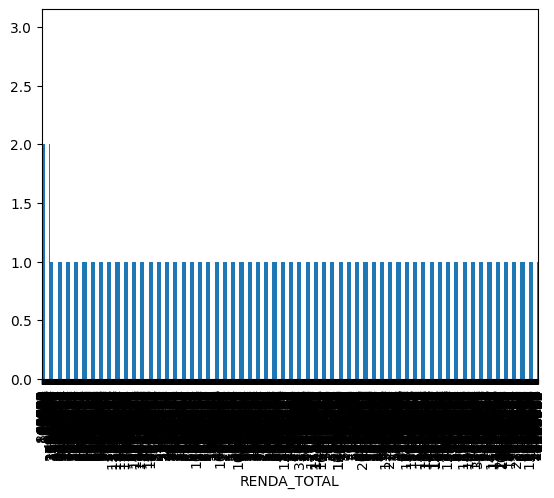

In [29]:
df['RENDA_TOTAL'].astype(int).value_counts().plot.bar()
df['RENDA_TOTAL'].value_counts()

df[['PUBLICO_TOTAL', 'RENDA_TOTAL',]]

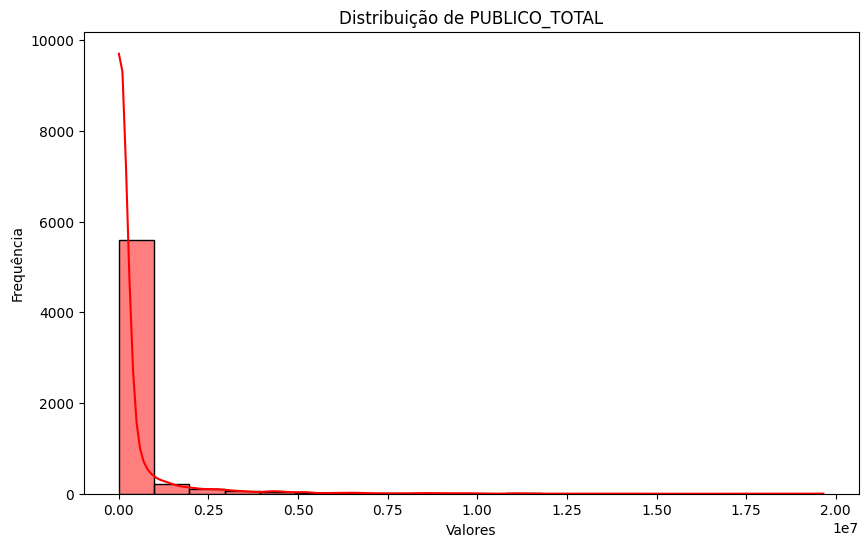

In [30]:
# Exemplo de histograma
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['PUBLICO_TOTAL'], bins=20, kde=True, color = 'red')
plt.title('Distribuição de PUBLICO_TOTAL')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()


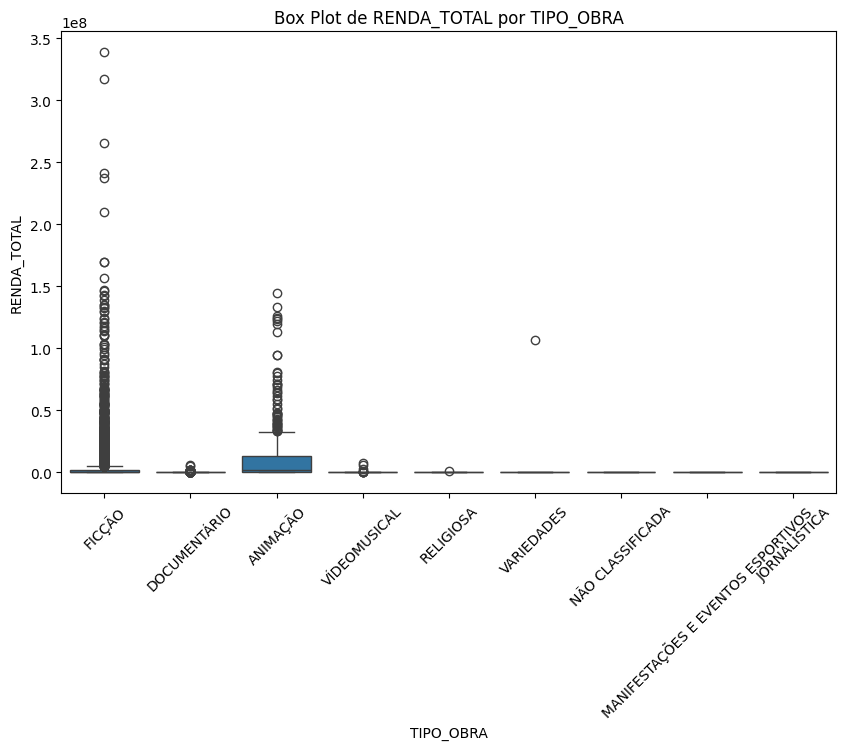

In [31]:
# Exemplo de box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='TIPO_OBRA', y='RENDA_TOTAL', data=df)
plt.title('Box Plot de RENDA_TOTAL por TIPO_OBRA')
plt.xlabel('TIPO_OBRA')
plt.ylabel('RENDA_TOTAL')
plt.xticks(rotation=45)
plt.show()



# Machine Learning


1. **Preparação dos Dados**:
   - O dataset da Ancine é carregado e pré-processado. Isso inclui a conversão da coluna 'RENDA_TOTAL' para valores numéricos e o tratamento de dados categóricos, como o país de origem da obra ('PAIS_OBRA'), utilizando a técnica OneHotEncoder para transformá-lo em formato numérico que o modelo pode utilizar.

2. **Definição das Variáveis**:
   - São definidas as variáveis de entrada (features) e a variável alvo (target):
     - **Features**: 'PUBLICO_TOTAL' (número total de espectadores), 'RENDA_TOTAL' (renda total gerada pela obra) e 'PAIS_OBRA' (país de origem da obra, codificado numericamente após o pré-processamento).
     - **Target**: 'TIPO_OBRA' (tipo da obra, que pode ser "Ficção" ou "Documentário").

3. **Divisão do Dataset**:
   - O dataset é dividido em conjunto de treino e conjunto de teste utilizando a função `train_test_split` da biblioteca `sklearn.model_selection`. Isso permite avaliar o desempenho do modelo em dados não vistos durante o treinamento, ajudando a garantir que o modelo generalize bem para novos dados.

4. **Modelagem com Árvore de Decisão**:
   - É escolhido o modelo de Árvore de Decisão (`DecisionTreeClassifier` do `sklearn.tree`). Este modelo é treinado com os dados de treino (`X_train` e `y_train`), onde aprende padrões nos dados que relacionam as features às classes de tipo de obra (Ficção ou Documentário).

5. **Avaliação do Modelo**:
   - Após o treinamento, o modelo é utilizado para fazer previsões sobre o conjunto de teste (`X_test`). As previsões são comparadas com as classes reais (`y_test`), e métricas de avaliação como acurácia (`accuracy_score`) e um relatório de classificação (`classification_report`) são gerados para avaliar o desempenho do modelo.
   
6. **Interpretação dos Resultados**:
   - A acurácia do modelo indica a proporção de previsões corretas que ele fez sobre o tipo de obra cinematográfica.
   - O relatório de classificação fornece métricas adicionais como precisão, recall, e F1-score para cada classe (Ficção e Documentário), ajudando a entender como o modelo performa para cada categoria.
   



In [32]:
# Importação das bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder # Import para handling categórico

# Carregamento do dataset
df = pd.read_csv('/content/Lançamentos Comerciais Distribuidoras.csv', sep=';')

# Converter a coluna 'RENDA_TOTAL' para valores numéricos,
# preenchendo valores vazios com 0
df['RENDA_TOTAL'] = df['RENDA_TOTAL'].str.replace('R\$ ', '', regex=True) \
                                    .str.replace('.', '', regex=True) \
                                    .str.replace(',', '.', regex=True)


# manuseando strings vazias
df['RENDA_TOTAL'] = df['RENDA_TOTAL'].replace('', '0').astype(float)

# Definir as variáveis de entrada e o target
features = ['PUBLICO_TOTAL', 'RENDA_TOTAL', 'PAIS_OBRA']
target = 'TIPO_OBRA'

X = df[features]
y = df[target]

# manuseando o pais_obra
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[['PAIS_OBRA']])

# Convertendo o dataframe par afacilitar o uso
X_encoded_df = pd.DataFrame.sparse.from_spmatrix(X_encoded)

# pegando os nomes para a coluna e feature
feature_names = encoder.get_feature_names_out(['PAIS_OBRA'])
X_encoded_df.columns = feature_names

# Concatenando as features
X = pd.concat([X.drop('PAIS_OBRA', axis=1), X_encoded_df], axis=1)

# garantindo que todas as colunas são strings
X.columns = X.columns.astype(str)

# Dividir o dataset em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar o modelo de Árvore de Decisão
model = DecisionTreeClassifier(random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')

# Exibir o relatório de classificação
print(classification_report(y_test, y_pred))



Acurácia do modelo: 0.70
                  precision    recall  f1-score   support

        ANIMAÇÃO       0.19      0.17      0.18        77
    DOCUMENTÁRIO       0.34      0.40      0.37       181
          FICÇÃO       0.83      0.80      0.81       953
    JORNALÍSTICA       0.00      0.00      0.00         1
NÃO CLASSIFICADA       0.00      0.00      0.00         0
       RELIGIOSA       0.00      0.00      0.00         1
      VARIEDADES       0.00      0.00      0.00         1
    VÍDEOMUSICAL       0.36      0.44      0.40         9

        accuracy                           0.70      1223
       macro avg       0.22      0.23      0.22      1223
    weighted avg       0.71      0.70      0.70      1223



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/u

### Justificativa do Uso do Modelo de Árvore de Decisão

O modelo de Árvore de Decisão foi escolhido para este problema de classificação por diversas razões fundamentais:

1. **Interpretabilidade**: As Árvores de Decisão são modelos intuitivos que permitem visualizar facilmente como a decisão de classificação é feita com base nas features disponíveis. Cada nó da árvore representa uma decisão baseada em uma única feature, tornando simples entender quais características são mais importantes para classificar uma obra como "Ficção" ou "Documentário". Isso é crucial para stakeholders que desejam entender os insights por trás das decisões do modelo.

2. **Manuseio de Dados Categóricos**: O dataset da Ancine inclui variáveis categóricas, como o país de origem da obra ('PAIS_OBRA'). O OneHotEncoder é uma técnica adequada para lidar com essas variáveis, convertendo categorias em valores numéricos que o modelo de Árvore de Decisão pode processar diretamente. Isso evita que a presença de variáveis categóricas prejudique a qualidade do modelo, garantindo que todas as informações relevantes sejam devidamente consideradas na classificação das obras.

3. **Desempenho Inicial e Capacidade de Captura de Relações Complexas**: Árvores de Decisão tendem a ter um desempenho inicial satisfatório em problemas de classificação. Elas são capazes de capturar relações não lineares entre as features e o target ('TIPO_OBRA'), o que é essencial neste contexto onde diferentes fatores podem influenciar se uma obra é categorizada como ficção ou documentário. Além disso, a capacidade das árvores de decisão de se adaptarem a padrões complexos nos dados permite explorar efetivamente a heterogeneidade das obras cinematográficas e dos lançamentos realizados pelas distribuidoras.

4. **Escalabilidade e Facilidade de Implementação**: Árvores de Decisão são modelos relativamente simples de entender e implementar. Eles não exigem grandes pré-requisitos de ajuste fino e podem ser eficientemente treinados em grandes volumes de dados, como o dataset da Ancine, sem comprometer significativamente o desempenho computacional.

5. **Avaliação e Interpretação de Resultados**: Além de prever o tipo de obra cinematográfica, as Árvores de Decisão fornecem uma estrutura clara para interpretar como cada feature contribui para as decisões de classificação. Isso é essencial para análises pós-modelagem e para fornecer insights acionáveis aos tomadores de decisão na indústria cinematográfica e de distribuição.




  DATA_LANCAMENTO_OBRA    TITULO_ORIGINAL         CPB_ROE     TIPO_OBRA  \
0           18/04/2024        SEM CORAÇÃO  B2400126700000        FICÇÃO   
1           18/04/2024        SILVER HAZE  E2300345200000        FICÇÃO   
2           18/04/2024  UM TIRO NO ESCURO  B2300243500000  DOCUMENTÁRIO   
3           04/04/2024    ARTHUR THE KING  E2400002700000        FICÇÃO   
4           04/04/2024    DOMINGO À NOITE  B2200374800000        FICÇÃO   

        PAIS_OBRA  PUBLICO_TOTAL    RENDA_TOTAL  \
0          ITÁLIA           4275   R$ 41.965,91   
1         HOLANDA            194    R$ 4.017,03   
2          BRASIL             83      R$ 830,00   
3  ESTADOS UNIDOS           4062  R$ 100.050,06   
4          BRASIL           1854   R$ 32.293,53   

                          RAZAO_SOCIAL_DISTRIBUIDORA  REGISTRO_DISTRIBUIDORA  \
0                                VITRINE FILMES LTDA                 16713.0   
1                                 BITELLI FILMS LTDA                 52026.0   
2 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

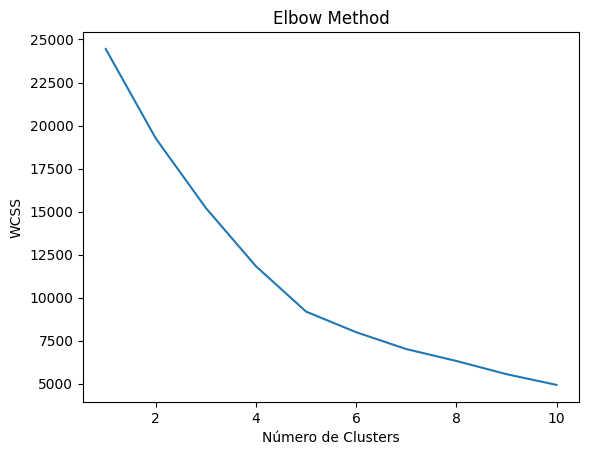

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-33-f11c990a6f28>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = clusters


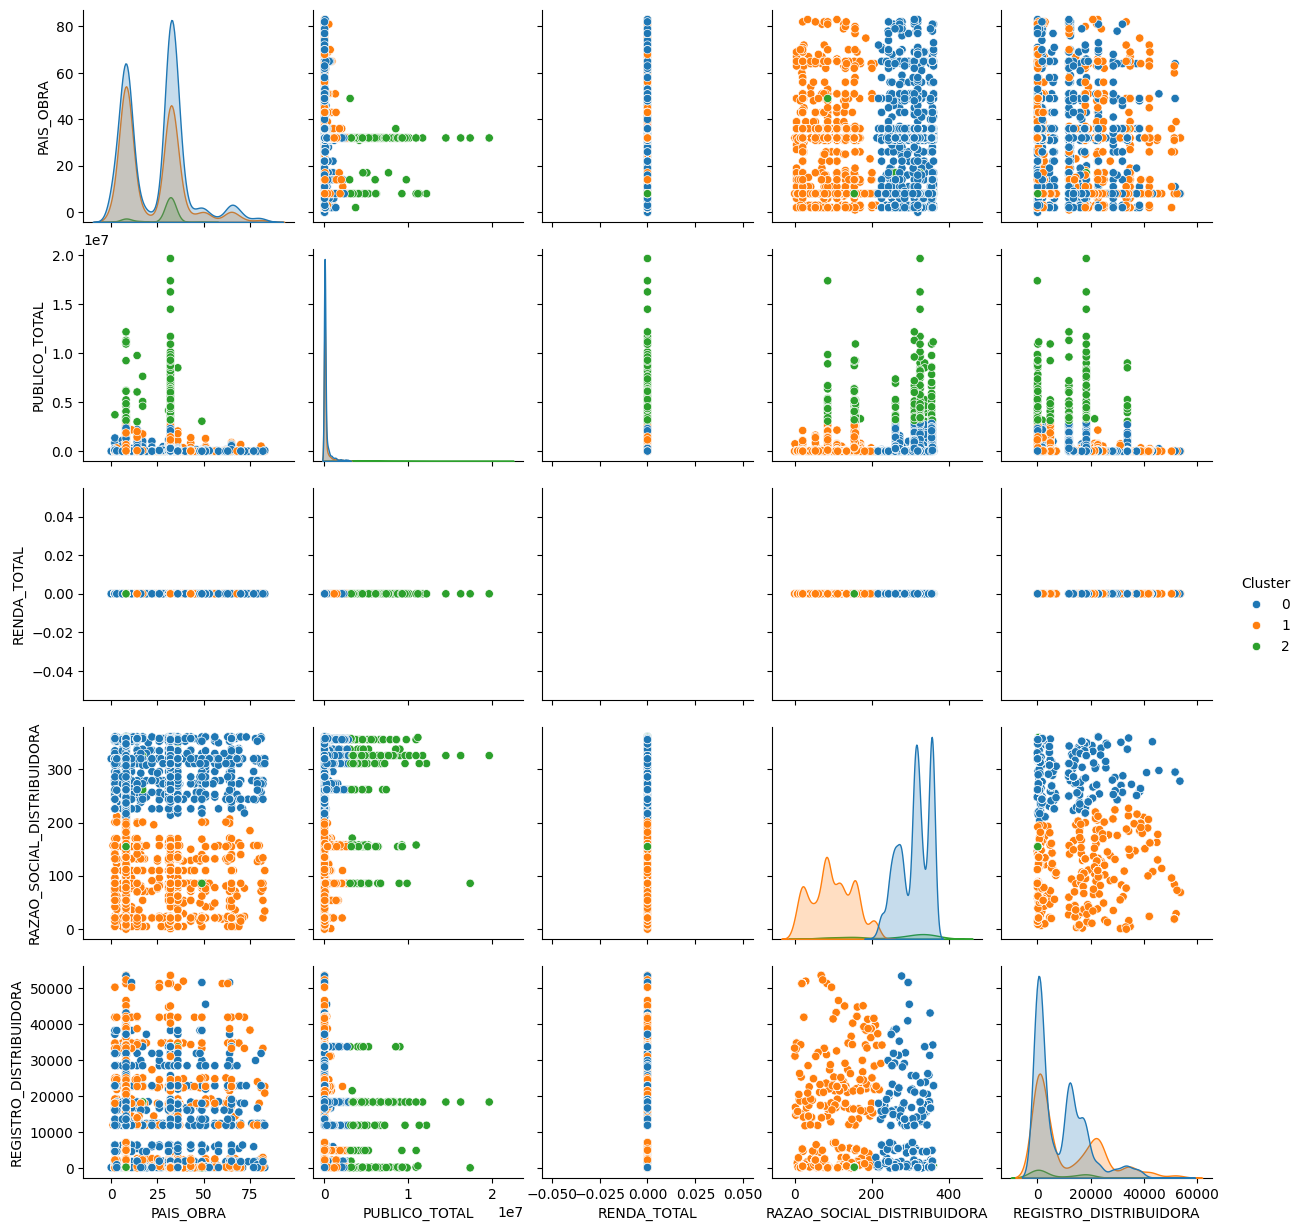

Silhouette Score: 0.3051891150346842


In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Caminho para o arquivo CSV

# Carregar os dados do CSV
df = pd.read_csv('/content/Lançamentos Comerciais Distribuidoras.csv', sep=';')

# Visualizar os primeiros registros do DataFrame
print(df.head())

# Conversão de colunas categóricas
label_encoders = {}
categorical_columns = ['PAIS_OBRA', 'RAZAO_SOCIAL_DISTRIBUIDORA']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Conversão de renda total para numérico, tratando valores ausentes
df['RENDA_TOTAL'] = df['RENDA_TOTAL'].str.replace('R\$ ', '', regex=True) \
                                    .str.replace('.', '', regex=True) \
                                    .str.replace(',', '.', regex=True) \
                                    .replace('', '0').astype(float) # tratamento de strings vazias

# seleção de features relevantes para clusterização
X = df.drop(columns=['TITULO_ORIGINAL', 'CPB_ROE', 'TIPO_OBRA', 'DATA_LANCAMENTO_OBRA', 'CNPJ_DISTRIBUIDORA'])

# Checagem de valores nulos
print(X.isnull().sum())

# dropar tabelas vazias
X = X.dropna()

# Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determinação do número ideal de clusters usando Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

# Aplicação do K-Means com o número ideal de clusters baseados no Elbow
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df = df.iloc[X.index]

# Adiciona os clusters ao DataFrame original
df['Cluster'] = clusters

# Visualização dos clusters
sns.pairplot(df, hue='Cluster', palette='tab10', diag_kind='kde')
plt.show()

# Silhouette Score para avaliação da qualidade dos clusters
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# nesse machine learning, nós:
1. preparamos o csv, carregando seus dados e vizualizando eles.
2. selecionamos as colunas mais importantes e utilizamos o elbow method(métdodo para achar a melhor quantidade de clusters)
3. iniciamos o k-means com a qtd de clusters fornecidas pelo Elbow method
4. vizualisamos os clusters criados e checamos a sillhouette score dos clusters

# utilizando as informações obtidas
 é possível descobir públicos alvos de diferentes tipos de generos de filmes,
entender a renda que cada filme produz e porquê a renda produzida foi essa,
compreender como os filmes escolhem suas datas de lançamento

# Porquê escolhemos a clusterização:
 estamos usando dados demográficos e de rendimento, logo sua utilização é naturalmente voltada para marketing e entendimento do público como consumidor e do produto consumido. A clusterização nos ajuda com os dados escolhidos pois ela segmenta o mercado de filmes do nosso csv e mostra como o público alvo interage com o produto, seja em relação ao gênero, país, ou até titulos.